In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
from data_quality import cargue_datasets_c
casos, hurto_tp, mede_victimas, compar = cargue_datasets_c()
hurto_ml = hurto_tp 

from data_quality import casos_c
casos=casos_c(casos)

from data_quality import hurto_tp_c
hurto_tp= hurto_tp_c(hurto_tp)

from data_quality import medevic_c
mede_victimas = medevic_c(mede_victimas)

In [3]:
# Codificar variables categóricas (como Sexo, Estado_civil, Transporte, Modalidad, Conducta, Comuna, Lugar, Bien)
categorical_cols = ['Sexo', 'Estado_civil', 'Transporte', 'Modalidad', 'Conducta', 'Comuna', 'Lugar', 'Bien']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    hurto_ml[col] = le.fit_transform(hurto_ml[col])
    label_encoders[col] = le
    #alm = label_encoders[col]

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = hurto_ml.drop(['Fecha','Sexo'], axis=1)  # Elimina las columnas
y = hurto_ml['Sexo']  # Define tu objetivo, en este caso 'Sexo'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def compare_metrics(learners,X,y,metrics,train_size,repeats):
    strlearners=[]
    for i in range(0,len(learners)):
        strlearners.append(str(learners[i]))  
    df=pd.DataFrame(columns=metrics,index=strlearners)
    for i in range (0,len(learners)):
        for j in range(0,len(metrics)):
            scores=[]
            for k in range(repeats):
                X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=train_size)
                learners[i].fit(X_train,y_train)
                y_hat = learners[i].predict(X_test)
                y_prob = learners[i].predict_proba(X_test)
                if metrics[j]=="Log loss":
                    scores.append(sklearn.metrics.log_loss(y_test, y_prob))
                if metrics[j]=="Brier Score Loss":
                    scores.append(sklearn.metrics.brier_score_loss(y_test, y_prob[:,1]))
                if metrics[j]=="Accuracy":
                    scores.append(sklearn.metrics.accuracy_score(y_test, y_hat))
                if metrics[j]=="Precision":
                    scores.append(sklearn.metrics.precision_score(y_test, y_hat))
                if metrics[j]=="F1":
                    scores.append(sklearn.metrics.f1_score(y_test, y_hat))
                if metrics[j]=="Recall":
                    scores.append(sklearn.metrics.recall_score(y_test, y_hat))
                if metrics[j]=="Auroc":
                    scores.append(sklearn.metrics.roc_auc_score(y_test, y_prob[:,1]))
            df.iloc[i,j]=np.mean(scores)
    return df

In [6]:
metricas=["Log loss","Brier Score Loss","Accuracy","Precision","F1","Recall","Auroc"]
decision_tree=DecisionTreeClassifier()
naive_bayes=GaussianNB()
kNN=KNeighborsClassifier()
log_regression = LogisticRegression()
RandomForest = RandomForestClassifier()
elearn=[decision_tree,naive_bayes,kNN,log_regression,RandomForest]

In [7]:
hurto_ml_scores  = compare_metrics(elearn,X,y,metricas,0.8,20)
hurto_ml_scores

c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting 

KeyboardInterrupt: 

##### Multietiqueta

In [8]:
bins = [-1, 12, 18, 30, 60, float('inf')]
labels = ['Niño', 'Adolescente', 'Adulto joven', 'Adulto', 'Adulto mayor']

# Utiliza pd.cut para crear los intervalos y asignar las etiquetas
hurto_ml['grupo_edad'] = pd.cut(hurto_ml['Edad'], bins=bins, labels=labels, right=False)

In [9]:
categorical_cols = ['grupo_edad']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    hurto_ml[col] = le.fit_transform(hurto_ml[col])
    label_encoders[col] = le

In [32]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = hurto_ml.drop(['Fecha', 'grupo_edad', 'Sexo','Edad'], axis=1)
y = list(zip(hurto_ml['grupo_edad'],hurto_ml['Sexo']))

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador multi-etiqueta (por ejemplo, Random Forest)
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Entrenar el modelo
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar el rendimiento del modelo
#print(classifier.score(X_train, np.array(y_train)))

In [34]:
y_train.shape[1]

AttributeError: 'list' object has no attribute 'shape'

C:\Users\Asus\AppData\Local\Temp\ipykernel_18780\231804863.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, int(np.ceil(n_outputs / 2)), valid_outputs + 1)


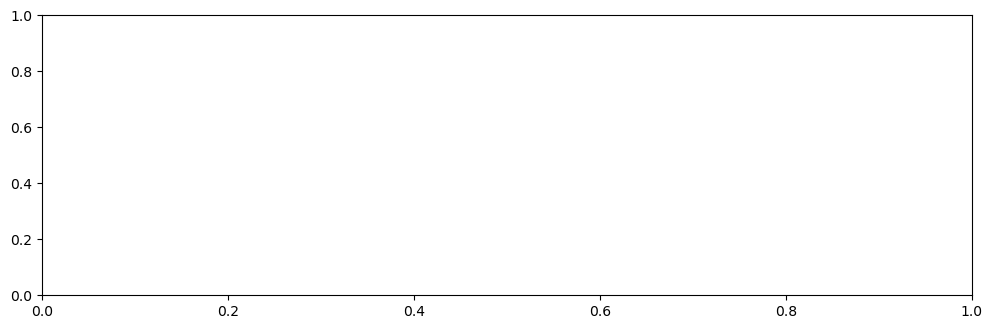

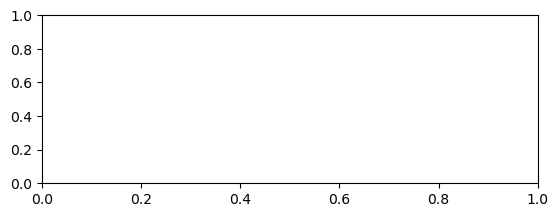

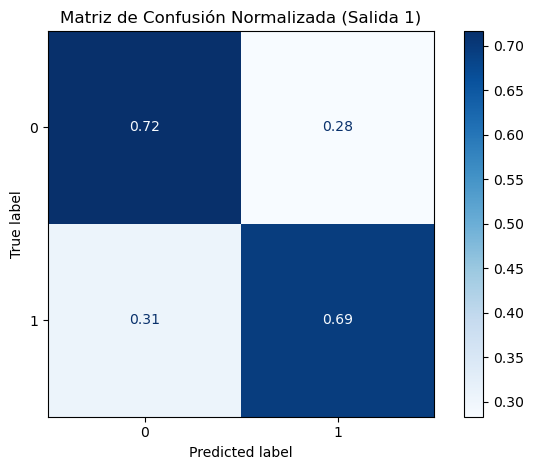

In [35]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calcula las matrices de confusión normalizadas

n_outputs = y_train.shape[1]
normalized_cm = []

for i in range(n_outputs):
    if np.any(y_test[:, i]) and np.any(y_pred[:, i]):
        cm = confusion_matrix(y_test[:, i], y_pred[:, i])
        
        # Asegúrate de que el denominador no sea cero
        denominator = cm.sum(axis=1, keepdims=True)
        denominator[denominator == 0] = 1  # Evitar división por cero
        normalized_cm.append(cm / denominator)
    else:
        normalized_cm.append(np.zeros((2, 2)))  # Matriz vacía si no hay muestras o predicciones para esta salida

# Grafica las matrices de confusión con etiquetas de correlación
plt.figure(figsize=(12, 8))
valid_outputs = 0  # Contador de salidas válidas

for i in range(n_outputs):
    if np.any(y_test[:, i]) and np.any(y_pred[:, i]):
        plt.subplot(2, int(np.ceil(n_outputs / 2)), valid_outputs + 1)
        
        # Mostrar la matriz de confusión normalizada con etiquetas de correlación
        disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm[i], display_labels=np.unique(y_test[:, i]))
        disp.plot(cmap=plt.cm.Blues, values_format=".2f")
        plt.title(f"Matriz de Confusión Normalizada (Salida {valid_outputs})")
        valid_outputs += 1

plt.tight_layout()
plt.show()

In [12]:
B_grupo_edad = {1:'Adulto', 2:'Adulto joven',3:'Adulto mayor',0:'Adolescente',4:'Niño'}
B_genero = {0:'Hombre', 1:'Mujer'}

In [13]:
test = [(1,3,3,11,13,66,43,2033)]

In [14]:
mapeo_categorias = dict(zip(label_encoders['grupo_edad'] .classes_, label_encoders['grupo_edad'] .transform(label_encoders['grupo_edad'] .classes_)))
valor_codificado = 1  # Reemplaza con el valor codificado que deseas revertir
valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
valor_original


'Adulto'

In [15]:
mapeo_categorias = dict(zip(le.classes_, le.transform(le.classes_)))

valor_codificado = 1 # Reemplaza con el valor codificado que deseas revertir

valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]

valor_original 

'Adulto'

In [16]:
y_pred = classifier.predict(test)

print('Género predicción:', B_genero[y_pred[0, 1]],'\n','Grupo edad predicción:', B_grupo_edad[y_pred[0, 0]])

Género predicción: Hombre 
 Grupo edad predicción: Adulto


c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Asus\miniconda3\envs\project\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
